In [82]:
import pandas as pd
import numpy as np

import seaborn as sns

In [83]:
path = 'archive/sentiment_tweets3.csv'

In [84]:
df = pd.read_csv(path)

In [85]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [86]:
df['label (depression result)'].value_counts()

label (depression result)
0    8000
1    2314
Name: count, dtype: int64

In [87]:
selected_rows=df[df['label (depression result)']==0].head(2314)

In [88]:
selected_rows1= df[df['label (depression result)'] == 1].head(2314)

In [89]:
combined_df=pd.concat([selected_rows1,selected_rows],ignore_index=True)

In [90]:
combined_df['label (depression result)'].value_counts()

label (depression result)
1    2314
0    2314
Name: count, dtype: int64

In [91]:
combined_df.tail()

,Index,message to examine,label (depression result)
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0
4625,236412,Glad to have gotten outta bed on my way back ...,0
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0
4627,236420,@brendax &lt;333333333 love you!,0


In [92]:
combined_df.loc[1031]['message to examine']

"@cuzyourehotshot @lovelyzband @infinitens97 it's not depression it's anxiety and i will let her know <Emoji: Face with tears of joy>"

In [93]:
combined_df.loc[3]['message to examine']

'Made myself a tortilla filled with pb&j. My depression is cured. Olivia:1 depression:0'

In [94]:
combined_df.loc[1034]['message to examine']

'25-04-2018'

In [95]:
combined_df.sum()

Index                                                               2127496584
message to examine           The lack of this understanding is a small but ...
label (depression result)                                                 2314
dtype: object

In [96]:
combined_df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [97]:
for i in combined_df['message to examine']:
    for j in i.split():
        if j.isdigit():
            s="yes"
        else:
            s="no"
print(s)            
            

no


Text preprocessing

lowercasing all the tweets

removal of punctuations

removal of stopwords

lemmatization


In [98]:
import re

In [99]:
# first remove all the numbers
def remove_numbers(text):
    return ''.join([i for i in str(text).split() if not i.isdigit()])
combined_df['clean_tweets']=combined_df['message to examine'].apply(lambda x : remove_numbers(x))

In [100]:
combined_df

,Index,message to examine,label (depression result),clean_tweets
0,800000,The lack of this understanding is a small but ...,1,Thelackofthisunderstandingisasmallbutsignifica...
1,800001,i just told my parents about my depression and...,1,ijusttoldmyparentsaboutmydepressionandit'ssoha...
2,800002,depression is something i don't speak about ev...,1,depressionissomethingidon'tspeakaboutevengoing...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,Mademyselfatortillafilledwithpb&j.Mydepression...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,"@WorldofOutlawsIamgonnaneeddepressionmedssoon,..."
...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"myBISconnectionisKapuT,noBBM,feelslonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,Ilovehownon-chalant&amp;bluntTonyMontanawas!Di...
4625,236412,Glad to have gotten outta bed on my way back ...,0,Gladtohavegottenouttabedonmywaybackhomefromare...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@FRin323noneofthat!!Ican'twait!!!sowhenthebigd...


In [101]:
# lowecasing all the tweets 
combined_df['clean_tweets']=combined_df['clean_tweets'].str.lower()

In [102]:
# remove weblinks
def remove_weblinks(text):
    return re.sub(r"http\S+","",text)
combined_df['clean_tweets2']=combined_df['clean_tweets'].apply(lambda x: remove_weblinks(x))

In [103]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2
0,800000,The lack of this understanding is a small but ...,1,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...
1,800001,i just told my parents about my depression and...,1,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...
2,800002,depression is something i don't speak about ev...,1,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,"@worldofoutlawsiamgonnaneeddepressionmedssoon,...","@worldofoutlawsiamgonnaneeddepressionmedssoon,..."
...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...
4625,236412,Glad to have gotten outta bed on my way back ...,0,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,@frin323noneofthat!!ican'twait!!!sowhenthebigd...


In [104]:
# remove twitter mentions
def remove_twitter(text):
    return re.sub('@[\w]+','',text)

In [105]:
combined_df['clean_tweets3']=combined_df['clean_tweets2'].apply(lambda x :remove_twitter (x))

In [106]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3
0,800000,The lack of this understanding is a small but ...,1,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...
1,800001,i just told my parents about my depression and...,1,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...
2,800002,depression is something i don't speak about ev...,1,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,"@worldofoutlawsiamgonnaneeddepressionmedssoon,...","@worldofoutlawsiamgonnaneeddepressionmedssoon,...",",theserainoutsarespinningmyequilibriumout<emoj..."
...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...
4625,236412,Glad to have gotten outta bed on my way back ...,0,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,!!ican'twait!!!sowhenthebigday???


In [107]:
 # removal of punctuations
import string
  

In [108]:
PUNCT_TO_REMOVE=string.punctuation

In [109]:
def remove_punctuation(text):
    return text.translate (str.maketrans('','',PUNCT_TO_REMOVE))

In [110]:
combined_df['clean_tweets4']=combined_df['clean_tweets3'].apply (lambda x : remove_punctuation(x))

In [111]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4
0,800000,The lack of this understanding is a small but ...,1,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...
1,800001,i just told my parents about my depression and...,1,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionanditssohar...
2,800002,depression is something i don't speak about ev...,1,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidontspeakaboutevengoingt...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpbjmydepressionis...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,"@worldofoutlawsiamgonnaneeddepressionmedssoon,...","@worldofoutlawsiamgonnaneeddepressionmedssoon,...",",theserainoutsarespinningmyequilibriumout<emoj...",theserainoutsarespinningmyequilibriumoutemojip...
...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely",mybisconnectioniskaputnobbmfeelslonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownonchalantampblunttonymontanawasdidntg...
4625,236412,Glad to have gotten outta bed on my way back ...,0,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,!!ican'twait!!!sowhenthebigday???,icantwaitsowhenthebigday


In [112]:
# removal stopwords 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
from nltk.corpus import stopwords
",".join(stopwords.words('english'))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [114]:
STOPWORDS=set(stopwords.words('english'))
def remove_stopwords(text):
     return "".join ([word for word in str(text).split() if word not in STOPWORDS])

In [115]:
combined_df['clean_tweets5']=combined_df['clean_tweets4'].apply(lambda x : remove_stopwords(x))

In [116]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5
0,800000,The lack of this understanding is a small but ...,1,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...
1,800001,i just told my parents about my depression and...,1,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionanditssohar...,ijusttoldmyparentsaboutmydepressionanditssohar...
2,800002,depression is something i don't speak about ev...,1,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidontspeakaboutevengoingt...,depressionissomethingidontspeakaboutevengoingt...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpbjmydepressionis...,mademyselfatortillafilledwithpbjmydepressionis...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,"@worldofoutlawsiamgonnaneeddepressionmedssoon,...","@worldofoutlawsiamgonnaneeddepressionmedssoon,...",",theserainoutsarespinningmyequilibriumout<emoj...",theserainoutsarespinningmyequilibriumoutemojip...,theserainoutsarespinningmyequilibriumoutemojip...
...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely",mybisconnectioniskaputnobbmfeelslonely,mybisconnectioniskaputnobbmfeelslonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownonchalantampblunttonymontanawasdidntg...,ilovehownonchalantampblunttonymontanawasdidntg...
4625,236412,Glad to have gotten outta bed on my way back ...,0,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,!!ican'twait!!!sowhenthebigday???,icantwaitsowhenthebigday,icantwaitsowhenthebigday


In [117]:
# frequent words
from collections import Counter
cnt= Counter()

for text in combined_df['clean_tweets5'].values:
    
    for word in text.split():
        
        cnt[word] +=1
cnt.most_common(10)         

[('momsdepressiontiedtokidsemotionalintellectualdevelopment', 28),
 ('morethaninuschildrenandteenshaveanxietyordepression', 8),
 ('depression', 7),
 ('iaddedavideotoa', 6),
 ('exercisingregularlycutsriskofdepressionby16studysuggests', 6),
 ('ilikeda', 5),
 ('whenfriendsstrugglewithdepressionthisapphelpsavoidpotentiallyharmfulphrases',
  5),
 ('symptomsofdepressioninmenandhowtheydifferfromthoseinwomen', 4),
 ('depressionisreal', 4),
 ('depressionsucks', 4)]

In [118]:
# rare words
n_rare_words=10
RAREWORDS=set([w for (w,wc)in cnt.most_common()[:-n_rare_words-1:1]]) 


In [119]:
RAREWORDS

{'youaresobrave',
 'syokurusuiswhoscurringmydepressiondaybydayhisenergeticsmileiswhatlightsmydarksoulimveryblessedtohavehiminmylifethankyouthatisall',
 'upearlyandthenbacktobed',
 'watchingtheidnhuvid',
 'postinfinitywardepression',
 'butthestoryoftheunreleasedbikeseatasatipwasawesome',
 'timeforbedhavetheearlyshifttomorrow',
 'hellodepressionmyoldfriendivecometotalkwithyouagain',
 'imgoingofftwitterforabitfeelingdepressedsincethepassingofmyauntieimtooupsetforthisespeciallythestressofbeingignoredsometimeswhichaddstothedepression',
 'wishingagreatmothersdaytomymomnanaandtheothermomsiknow',
 'adraftprojectwithastrongideaperspectivestartuptraxionicoat',
 'depressionandobsessiondontmixwell',
 'buttherecanbenoexecutionifthereisnovisiontostartwith',
 'vintagedepressioneracandlewicksinglecandleholderbyimperialglasscompany',
 'iwillbethesuninyourskyiwilllightyourwayforalltimepromiseyouforyouiwillll',
 'absolutelybeautifultodayheadedouttohityardsalesandrunerrandstwitterpeoplehaveawonderfulfrida

In [120]:
# let's remove these stopwords
def remove_stopwords(text):
    return "".join([word for word in str(text).split() if word not in RAREWORDS])


In [121]:
combined_df['clean_tweets6']=combined_df['clean_tweets5'].apply (lambda x : remove_stopwords(x))

In [122]:
# lemmatization
nltk.download('wordnet')
nltk.download('averaged_preceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading averaged_preceptron_tagger: Package
[nltk_data]     'averaged_preceptron_tagger' not found in index


False

In [123]:
import nltk

# Download the averaged_perceptron_tagger if needed
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [124]:
print(nltk.data.path)


['/home/codespace/nltk_data', '/home/codespace/.python/current/nltk_data', '/home/codespace/.python/current/share/nltk_data', '/home/codespace/.python/current/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [125]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
wordnet_map={"n": wordnet.NOUN,"v":wordnet.VERB, "j":wordnet.ADJ, "r" : wordnet.ADV}

In [126]:
def lemmatize_words(text):
    pos_tagged_text=nltk.pos_tag(text.split())
    return "".join([lemmatizer.lemmatize(word,wordnet_map.get(pos[0],wordnet.VERB)) for word,pos in pos_tagged_text])
combined_df["text_lemmatized"]=combined_df['clean_tweets6'].apply (lambda text : lemmatize_words(text))

In [127]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized
0,800000,The lack of this understanding is a small but ...,1,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,,
1,800001,i just told my parents about my depression and...,1,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionanditssohar...,ijusttoldmyparentsaboutmydepressionanditssohar...,,
2,800002,depression is something i don't speak about ev...,1,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidontspeakaboutevengoingt...,depressionissomethingidontspeakaboutevengoingt...,,
3,800003,Made myself a tortilla filled with pb&j. My de...,1,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpbjmydepressionis...,mademyselfatortillafilledwithpbjmydepressionis...,,
4,800004,@WorldofOutlaws I am gonna need depression med...,1,"@worldofoutlawsiamgonnaneeddepressionmedssoon,...","@worldofoutlawsiamgonnaneeddepressionmedssoon,...",",theserainoutsarespinningmyequilibriumout<emoj...",theserainoutsarespinningmyequilibriumoutemojip...,theserainoutsarespinningmyequilibriumoutemojip...,,
...,...,...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely",mybisconnectioniskaputnobbmfeelslonely,mybisconnectioniskaputnobbmfeelslonely,mybisconnectioniskaputnobbmfeelslonely,mybisconnectioniskaputnobbmfeelslonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownonchalantampblunttonymontanawasdidntg...,ilovehownonchalantampblunttonymontanawasdidntg...,ilovehownonchalantampblunttonymontanawasdidntg...,ilovehownonchalantampblunttonymontanawasdidntg...
4625,236412,Glad to have gotten outta bed on my way back ...,0,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,!!ican'twait!!!sowhenthebigday???,icantwaitsowhenthebigday,icantwaitsowhenthebigday,icantwaitsowhenthebigday,icantwaitsowhenthebigday


In [128]:
# replace some short words
short_words={
    "aint":"am not"
    "arent""are not",
    "cant":"cannot",
    "cause":"bacause",
    "could've":"coould have",
    "couldn't":"could not",
    "didn't":"did not",
    "doesnt":"does not",
    "don't":"do not",
    "hadnt":"had not",
    "hasnt":"has not",
    "havent":"have not",
    "im":"I am ",
    "em": "them",
    "ive": "I have",
    "isnt": "is not",
    "lets": "let us",
    "theyre": "they are",
    "theyve": "they have",
    "wasnt": "was not",
    "well": "we will",
    "were": "we are",
    "werent": "were not",
    "you're": "you are",
    "you've": "you have"
}


In [129]:
def replace_short_words(text):
    for word in text.split():
        if word in short_words:
            text=text.replace(word.short_words[word])
    return text
        

In [130]:
combined_df["clean_tweets7"]=combined_df['text_lemmatized'].apply(lambda text: replace_short_words(text))

In [131]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized,clean_tweets7
0,800000,The lack of this understanding is a small but ...,1,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,thelackofthisunderstandingisasmallbutsignifica...,,,
1,800001,i just told my parents about my depression and...,1,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionandit'ssoha...,ijusttoldmyparentsaboutmydepressionanditssohar...,ijusttoldmyparentsaboutmydepressionanditssohar...,,,
2,800002,depression is something i don't speak about ev...,1,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidon'tspeakaboutevengoing...,depressionissomethingidontspeakaboutevengoingt...,depressionissomethingidontspeakaboutevengoingt...,,,
3,800003,Made myself a tortilla filled with pb&j. My de...,1,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpb&j.mydepression...,mademyselfatortillafilledwithpbjmydepressionis...,mademyselfatortillafilledwithpbjmydepressionis...,,,
4,800004,@WorldofOutlaws I am gonna need depression med...,1,"@worldofoutlawsiamgonnaneeddepressionmedssoon,...","@worldofoutlawsiamgonnaneeddepressionmedssoon,...",",theserainoutsarespinningmyequilibriumout<emoj...",theserainoutsarespinningmyequilibriumoutemojip...,theserainoutsarespinningmyequilibriumoutemojip...,,,
...,...,...,...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely","mybisconnectioniskaput,nobbm,feelslonely",mybisconnectioniskaputnobbmfeelslonely,mybisconnectioniskaputnobbmfeelslonely,mybisconnectioniskaputnobbmfeelslonely,mybisconnectioniskaputnobbmfeelslonely,mybisconnectioniskaputnobbmfeelslonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownon-chalant&amp;blunttonymontanawas!di...,ilovehownonchalantampblunttonymontanawasdidntg...,ilovehownonchalantampblunttonymontanawasdidntg...,ilovehownonchalantampblunttonymontanawasdidntg...,ilovehownonchalantampblunttonymontanawasdidntg...,ilovehownonchalantampblunttonymontanawasdidntg...
4625,236412,Glad to have gotten outta bed on my way back ...,0,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...,gladtohavegottenouttabedonmywaybackhomefromare...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,@frin323noneofthat!!ican'twait!!!sowhenthebigd...,!!ican'twait!!!sowhenthebigday???,icantwaitsowhenthebigday,icantwaitsowhenthebigday,icantwaitsowhenthebigday,icantwaitsowhenthebigday,icantwaitsowhenthebigday


In [132]:
xdf=combined_df[['Index','label (depression result)','clean_tweets7']]

In [133]:
xdf

,Index,label (depression result),clean_tweets7
0,800000,1,
1,800001,1,
2,800002,1,
3,800003,1,
4,800004,1,
...,...,...,...
4623,235935,0,mybisconnectioniskaputnobbmfeelslonely
4624,236037,0,ilovehownonchalantampblunttonymontanawasdidntg...
4625,236412,0,gladtohavegottenouttabedonmywaybackhomefromare...
4626,236419,0,icantwaitsowhenthebigday


In [134]:
xdf.columns=['Index','Labels','Tweets']


In [135]:
xdf

,Index,Labels,Tweets
0,800000,1,
1,800001,1,
2,800002,1,
3,800003,1,
4,800004,1,
...,...,...,...
4623,235935,0,mybisconnectioniskaputnobbmfeelslonely
4624,236037,0,ilovehownonchalantampblunttonymontanawasdidntg...
4625,236412,0,gladtohavegottenouttabedonmywaybackhomefromare...
4626,236419,0,icantwaitsowhenthebigday


In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [137]:
sentences=xdf['Tweets'].tolist()

In [138]:
len(sentences)

4628

In [139]:
joined_sentences=" ".join(sentences)

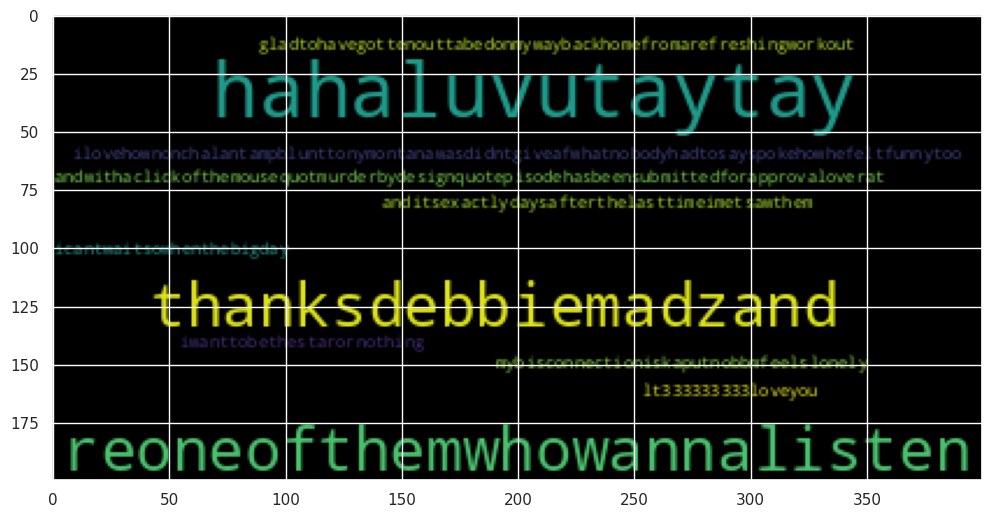

In [140]:
plt.figure(figsize=(12,8))
plt.imshow(WordCloud().generate(joined_sentences));


In [141]:
xdf['Labels'].value_counts()

Labels
1    2314
0    2314
Name: count, dtype: int64

In [142]:
positive_tweets=xdf[xdf['Labels']==0]
positive_sentences=positive_tweets['Tweets'].tolist()
positive_string=" ".join(positive_sentences)


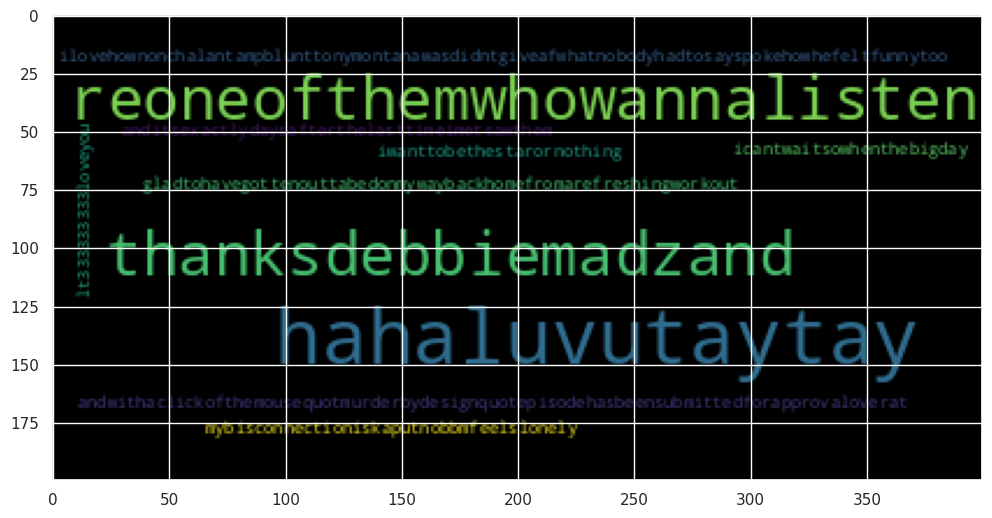

In [143]:
plt.figure(figsize=(12,8))
plt.imshow(WordCloud().generate(positive_string));


Text Preprocessing: Part II

tf-idf

word2vec

In [144]:
# BASIC SENTIMENT ANALYSIS
# FIRST WE WILL BUILD OUR MODEL WITH BASIC SENTIMENT ANALYSIS TECHNIQUE WITH tf-idf and NaiveBayes Classifier 

from sklearn.feature_extraction.text import TfidfVectorizer

cv =TfidfVectorizer()

tfidf=cv.fit_transform(xdf['Tweets'])



In [145]:
# splitting Dataset
from sklearn.model_selection import train_test_split

tfX_train,tfX_test,tfy_train,tfy_test=train_test_split(tfidf,xdf['Labels'],test_size=0.2)

In [146]:
tfX_train

<3702x11 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [147]:
tfX_train.shape

(3702, 11)

Models and Evaluation

In [148]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()

mnb.fit(tfX_train,tfy_train)

MultinomialNB()

In [149]:
from sklearn.metrics import confusion_matrix ,accuracy_score

y_pred_mnb=mnb.predict(tfX_test)

print(f'accuracy score is :{accuracy_score(tfy_test,y_pred_mnb)}')

accuracy score is :0.48488120950323976


In [150]:
cf=confusion_matrix(tfy_test,y_pred_mnb,labels=[1,0])

In [151]:
cf

array([[449,   0],
       [477,   0]])

ValueError: dictionary update sequence element #0 has length 7; 2 is required

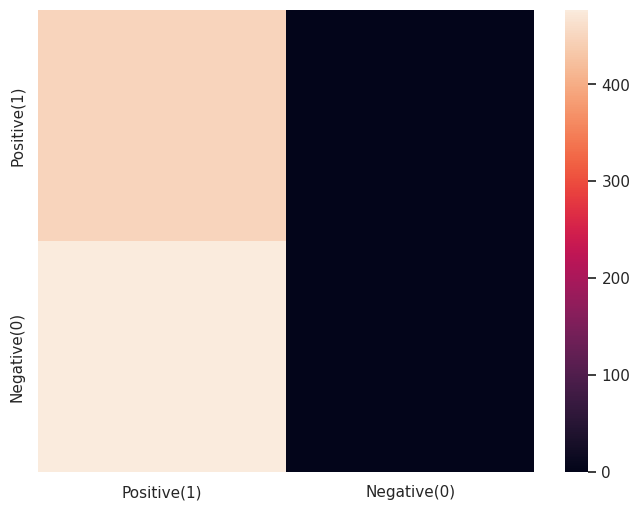

In [152]:
x_axis_labels=["Positive(1)","Negative(0)"]
y_axis_labels=["Positive(1)","Negative(0)"]

plt.figure(figsize=(8,6))

sns.set_theme(font_scale=1)
sns.heatmap(cf,xticklabels=x_axis_labels,yticklabels=y_axis_labels,annot=True,fmt='g',annot_kws={'size:16'})
plt.xlabel("Actual class" ,font_size=20)
plt.ylabel("Predicted Class",fontsize=20)
plt.show()

In [ ]:
pip install tensorflow hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 2.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 34.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.0 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.0/409.0 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding,LSTM, SimpleRNN ,Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub


In [ ]:
embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

2024-06-28 23:46:35.646318: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1009375000 exceeds 10% of free system memory.


In [153]:
def get_max_length(df):
      ## get max token counts from train data,
  ## so we use this number as fixed length input to RNN cell

  max_length = 0
  for row in xdf['Tweets']:
    if len(row.split(" ")) > max_length:
      max_length = len(row.split(" "))
  
  return max_length

In [154]:
get_max_length(xdf['Tweets'])

1

In [155]:
def get_word2vec_enc(tweets):
      ## get word2vec value for each word in sentence
  # concatenate word in numpy array, so we can use it as RNN input

  encoded_tweets = []
  for tweet in tweets:
    tokens = tweet.split(" ")
    word2vec_embedding = embed(tokens)
    encoded_tweets.append(word2vec_embedding)
  return encoded_tweets

In [156]:
def get_padded_encoded_tweets(encoded_tweets):
      # for short sentences, we prepend zero padding so all input to RNN
  # has same length

  padded_tweets_encoding = []
  for enc_tweet in encoded_tweets:
    zero_padding_cnt = max_length - enc_tweet.shape[0]
    pad = np.zeros((1, 250))
    for i in range(zero_padding_cnt):
      enc_tweet = np.concatenate((pad, enc_tweet), axis = 0)
    padded_tweets_encoding.append(enc_tweet)
  return padded_tweets_encoding

In [157]:
def sentiment_encode(sentiment):
    if sentiment == 0:
        return [0,1]
    else:
        return [1,0]

In [158]:
def preprocess(df):
      # encode text value to numeric value

  tweets = df['Tweets'].tolist()

  encoded_tweets = get_word2vec_enc(tweets)
  padded_encoded_tweets = get_padded_encoded_tweets(encoded_tweets)

  #encoded sentiment
  sentiments = df['Labels'].tolist()
  encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]

  X = np.array(padded_encoded_tweets)
  Y = np.array(encoded_sentiment)

  return X, Y

In [159]:
# Preprocess 

max_length = get_max_length(xdf)
max_length

1

In [160]:
tdf = xdf.sample(frac = 1)
train = tdf[:3702]
test = tdf[3702:]

In [161]:
train.shape, test.shape

((3702, 3), (926, 3))

In [162]:
train_X, train_Y = preprocess(train)
test_X, test_Y = preprocess(test)

In [163]:
# LSTM

model = Sequential()
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation = 'softmax'))

In [164]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [165]:
model.fit(train_X, train_Y, epochs = 10)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4969 - loss: 0.6933
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4980 - loss: 0.6932
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4948 - loss: 0.6932
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5070 - loss: 0.6933
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5030 - loss: 0.6932
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5061 - loss: 0.6932
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4993 - loss: 0.6933
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4996 - loss: 0.6931
Epoch 9/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4976 - loss: 0.6932
Epoch 10/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4882 - loss: 0.6932


In [166]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 64)             │        72,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,736 (850.54 KB)

 Trainable params: 72,578 (283.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 145,158 (567.03 KB)

In [167]:
score, acc = model.evaluate(test_X, test_Y, verbose = 2)
print("Test Score:", score)
print("Test Accuracy:", acc)

29/29 - 0s - 10ms/step - accuracy: 0.4946 - loss: 0.6932
Test Score: 0.6931926608085632
Test Accuracy: 0.49460044503211975


In [168]:
y_pred = model.predict(test_X)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [169]:
import sklearn.metrics as metrics

In [170]:
matrix = metrics.confusion_matrix(test_Y.argmax(axis = 1), y_pred.argmax(axis = 1), labels = [1,0])

In [171]:
matrix

array([[458,   0],
       [468,   0]])

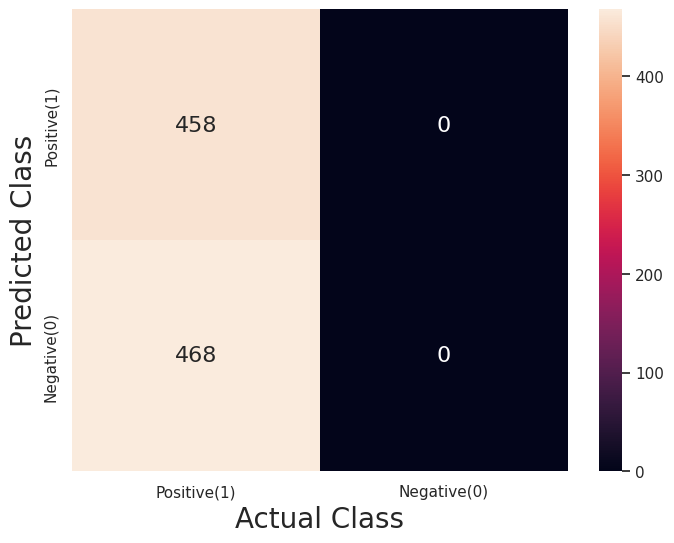

In [172]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set_theme(font_scale=1)
sns.heatmap(matrix, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()